In [54]:
from google.colab import files
uploaded=files.upload()


Saving duration_of_unemployment_2006-19.csv to duration_of_unemployment_2006-19 (1).csv


In [55]:

import pandas as pd
pd.read_csv('duration_of_unemployment_2006-19.csv')




,Year,Geography,Immig.,Dur. of unempl,Age group,Both sexes,Males,Females
0,2006,Canada,Total,Total unemployed,15 years and over,1106.2,606.1,500.1
1,2006,Canada,Total,Total unemployed,15-24 years,335.7,189.1,146.6
2,2006,Canada,Total,Total unemployed,25 years and over,770.5,417.0,353.5
3,2006,Canada,Total,Total unemployed,25-44 years,448.4,239.8,208.6
4,2006,Canada,Total,Total unemployed,45 years and over,322.1,177.2,144.9
...,...,...,...,...,...,...,...,...
29563,2019,Ontario,Non-landed immigrants,Average weeks unemployed (top-code = 99 weeks),55 years and over,0.0,0.0,0.0
29564,2019,Ontario,Non-landed immigrants,Average weeks unemployed (top-code = 99 weeks),55-64 years,0.0,0.0,0.0
29565,2019,Ontario,Non-landed immigrants,Average weeks unemployed (top-code = 99 weeks),65 years and over,0.0,0.0,0.0
29566,2019,Ontario,Non-landed immigrants,Average weeks unemployed (top-code = 99 weeks),15-29 years,0.0,0.0,0.0


In [56]:
# We shall begin our exploratory data analysis to check for features that will help us predict the duration of unemployment 
# and also check for and treat any irregularitiles in the data set such as outliers 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
%matplotlib inline

In [57]:
df = pd.read_csv('duration_of_unemployment_2006-19.csv')
df = pd.DataFrame(df)
print(df)
df.info()
df.head()
# The outout gives us an overview of the data set

       Year Geography                   Immig.  \
0      2006    Canada                    Total   
1      2006    Canada                    Total   
2      2006    Canada                    Total   
3      2006    Canada                    Total   
4      2006    Canada                    Total   
...     ...       ...                      ...   
29563  2019   Ontario    Non-landed immigrants   
29564  2019   Ontario    Non-landed immigrants   
29565  2019   Ontario    Non-landed immigrants   
29566  2019   Ontario    Non-landed immigrants   
29567  2019   Ontario    Non-landed immigrants   

                                       Dur. of unempl          Age group  \
0                                    Total unemployed  15 years and over   
1                                    Total unemployed       15-24 years    
2                                    Total unemployed  25 years and over   
3                                    Total unemployed        25-44 years   
4                  

,Year,Geography,Immig.,Dur. of unempl,Age group,Both sexes,Males,Females
0,2006,Canada,Total,Total unemployed,15 years and over,1106.2,606.1,500.1
1,2006,Canada,Total,Total unemployed,15-24 years,335.7,189.1,146.6
2,2006,Canada,Total,Total unemployed,25 years and over,770.5,417.0,353.5
3,2006,Canada,Total,Total unemployed,25-44 years,448.4,239.8,208.6
4,2006,Canada,Total,Total unemployed,45 years and over,322.1,177.2,144.9


In [71]:

# set categorical data
df['Geography'] = df['Geography'].astype('category')
df['Immig.'] = df['Immig.'].astype('category')
df['Dur. of unempl'] = df['Dur. of unempl'].astype('category')
df['Age group'] = df['Age group'].astype('category')



In [73]:
# After examination we will remove the 'Year' and 'Geography' columm as they are not significant in answering our reserch questions.
df1 = df.drop(['Year', 'Geography'], axis=1)
# To see what the data set looks like after the column drop
df1.head(5)


,Immig.,Dur. of unempl,Age group,Both sexes,Males,Females,Age group
0,Total,Total unemployed,15 years and over,1106.2,606.1,500.1,15 years and over
1,Total,Total unemployed,15-24 years,335.7,189.1,146.6,15-24 years
2,Total,Total unemployed,25 years and over,770.5,417.0,353.5,25 years and over
3,Total,Total unemployed,25-44 years,448.4,239.8,208.6,25-44 years
4,Total,Total unemployed,45 years and over,322.1,177.2,144.9,45 years and over


In [74]:
# To det an overview of the data set now after thw column drop
df1.shape

(29568, 7)

In [80]:
# After examining our data, the column "Dur. of unempl" will best answer our reserch questions.
# As the goal is predicting the duration of unemployment, the next step is examining the features of the column...
df1['Dur. of unempl'].value_counts()

      27 - 51 weeks                               2464
      52 weeks                                    2464
      53 weeks or more                            2464
   1 - 4 weeks                                    2464
   14 - 25 weeks                                  2464
   26 weeks                                       2464
   27 weeks or more                               2464
   5 - 13 weeks                                   2464
   Duration unknown                               2464
Average weeks unemployed (no top-code)            2464
Average weeks unemployed (top-code = 99 weeks)    2464
Total unemployed                                  2464
Name: Dur. of unempl, dtype: int64

In [84]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

        
def time_series_plot(df):
    """Given dataframe, generate times series plot of numeric data by daily, monthly and yearly frequency"""
    print("\nTo check time series of numeric data  by daily, monthly and yearly frequency")
    if len(df.select_dtypes(include='datetime64').columns)>0:
        for col in df.select_dtypes(include='datetime64').columns:
            for p in ['D', 'M', 'Y']:
                if p=='D':
                    print("Plotting daily data")
                elif p=='M':
                    print("Plotting monthly data")
                else:
                    print("Plotting yearly data")
                for col_num in df.select_dtypes(include=np.number).columns:
                    __ = df.copy()
                    __ = __.set_index(col)
                    __T = __.resample(p).sum()
                    ax = __T[[col_num]].plot()
                    ax.set_ylim(bottom=0)
                    ax.get_yaxis().set_major_formatter(
                    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
                    plt.show()

                    
def numeric_eda(df, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df.describe().T)
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()
    
    if len(df.select_dtypes(include='category').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='category').columns:
                fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
                fig.set_xticklabels(rotation=90)
                plt.show()
    
    # Plot the pairwise joint distributions
    print("\nTo check pairwise joint distribution of numeric data")
    if hue==None:
        sns.pairplot(df.select_dtypes(include=np.number))
    else:
        sns.pairplot(df.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    plt.show()


def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")
    
    
def categorical_eda(df, hue=None):
    """Given dataframe, generate EDA of categorical data"""
    print("\nTo check: \nUnique count of non-numeric data\n")
    print(df.select_dtypes(include=['object', 'category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, hue=hue)
        fig.set_xticklabels(rotation=90)
        plt.show()
    

def eda(df):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
        
    # replace field that's entirely space (or empty) with NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)

    print("Preview of data:")
    display(df.head(3))

    print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    print(df.info())

    # generate preview of entries with null values
    if df.isnull().any(axis=None):
        print("\nPreview of data with null values:")
        display(df[df.isnull().any(axis=1)].head(3))
        missingno.matrix(df)
        plt.show()

    # generate count statistics of duplicate entries
    if len(df[df.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated entries found")

    # EDA of categorical data
    categorical_eda(df)
    
    # EDA of numeric data
    numeric_eda(df)
        
    # Plot time series plot of numeric data
    time_series_plot(df)

Preview of data:


,Immig.,Dur. of unempl,Age group,Both sexes,Males,Females,Age group
0,Total,Total unemployed,15 years and over,1106.2,606.1,500.1,15 years and over
1,Total,Total unemployed,15-24 years,335.7,189.1,146.6,15-24 years
2,Total,Total unemployed,25 years and over,770.5,417.0,353.5,25 years and over



To check: 
 (1) Total number of entries 
 (2) Column types 
 (3) Any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29568 entries, 0 to 29567
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Immig.          29568 non-null  category
 1   Dur. of unempl  29568 non-null  category
 2   Age group       29568 non-null  category
 3   Both sexes      29568 non-null  float64 
 4    Males          29568 non-null  float64 
 5    Females        29568 non-null  float64 
 6   Age group       29568 non-null  category
dtypes: category(4), float64(3)
memory usage: 810.1 KB
None

***Number of duplicated entries:  10122


,Immig.,Dur. of unempl,Age group,Both sexes,Males,Females,Age group
859,"Established immigrants, 10+ years",27 - 51 weeks,15-24 years,0.0,0.0,0.0,15-24 years
1915,"Established immigrants, 10+ years",27 - 51 weeks,15-24 years,0.0,0.0,0.0,15-24 years
2971,"Established immigrants, 10+ years",27 - 51 weeks,15-24 years,0.0,0.0,0.0,15-24 years
4027,"Established immigrants, 10+ years",27 - 51 weeks,15-24 years,0.0,0.0,0.0,15-24 years
5083,"Established immigrants, 10+ years",27 - 51 weeks,15-24 years,0.0,0.0,0.0,15-24 years



To check: 
Unique count of non-numeric data

Immig.             8
Dur. of unempl    12
Age group         11
Age group         11
dtype: int64
Top 5 unique values of Immig.
                                          Immig.  Count
0              Established immigrants, 10+ years   3696
1              Recent immigrants, 5+ to 10 years   3696
2                     Recent immigrants 5+ years   3696
3        Very recent immigrants, 5 years or less   3696
4                                 Born in Canada   3696
 
Top 5 unique values of Dur. of unempl
           Dur. of unempl  Count
0           27 - 51 weeks   2464
1                52 weeks   2464
2        53 weeks or more   2464
3             1 - 4 weeks   2464
4           14 - 25 weeks   2464
 
Top 5 unique values of Age group
           Age group  Count
0  15 years and over   2688
1       15-24 years    2688
2        15-29 years   2688
3  25 years and over   2688
4        25-44 years   2688
 
Top 5 unique values of Age group 
          Age 

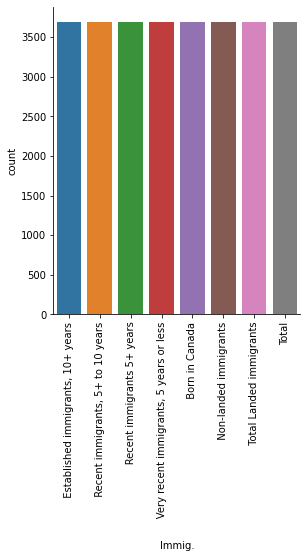

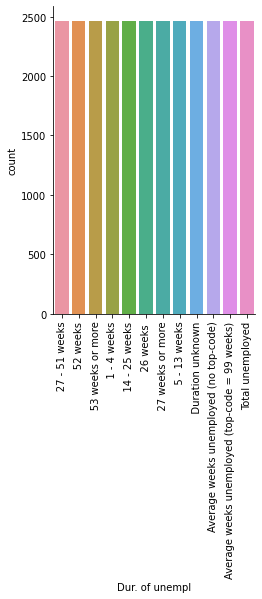

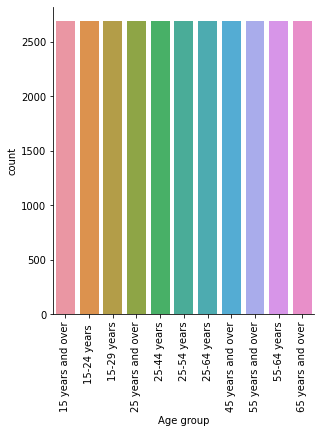

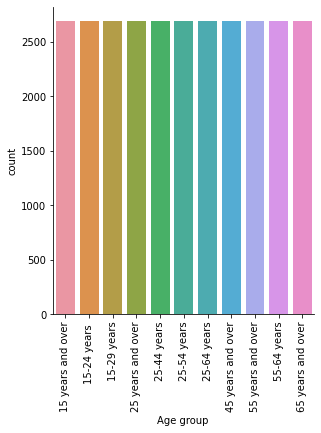


To check: 
Distribution of numeric data


,count,mean,std,min,25%,50%,75%,max
Both sexes,29568.0,23.754769,70.139967,0.0,0.0,5.1,20.5,1522.8
Males,29568.0,13.932586,39.863856,0.0,0.0,2.6,13.4,917.7
Females,29568.0,11.348911,30.803245,0.0,0.0,2.3,11.6,632.9


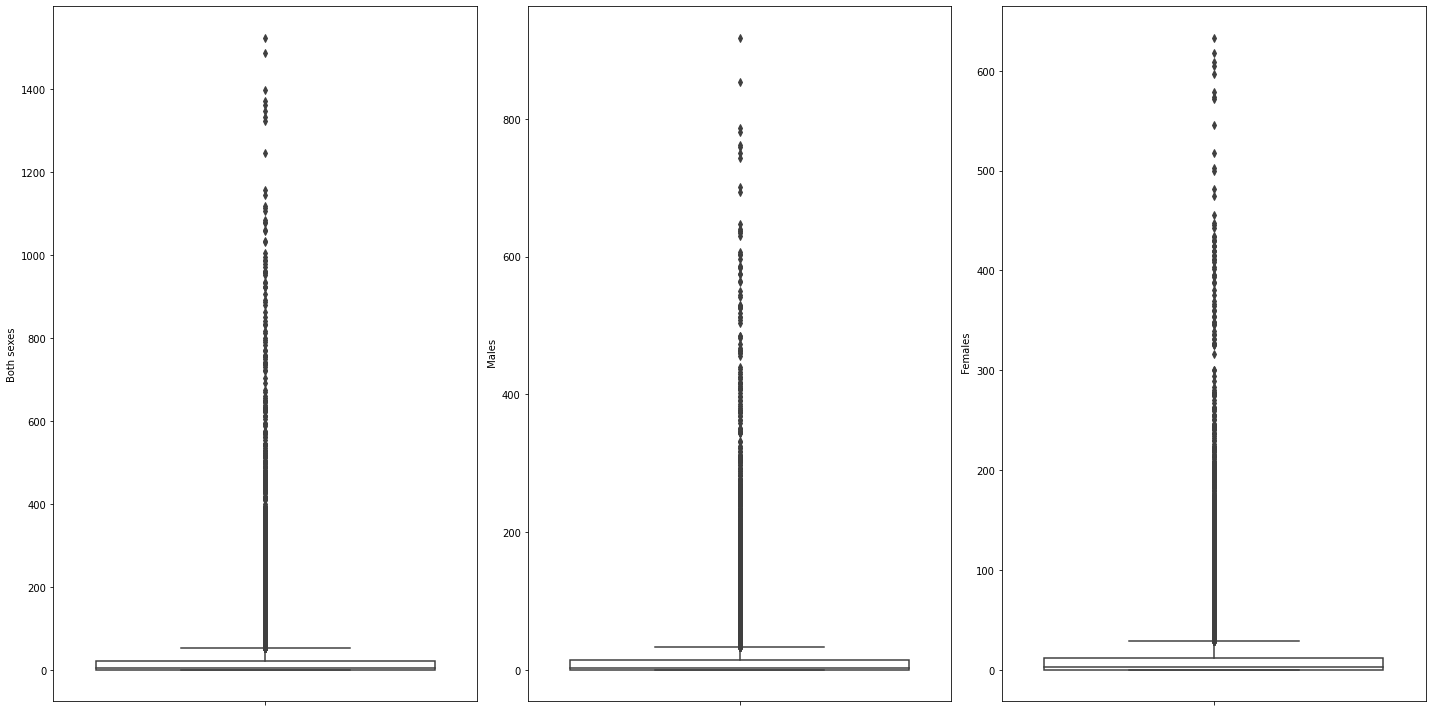

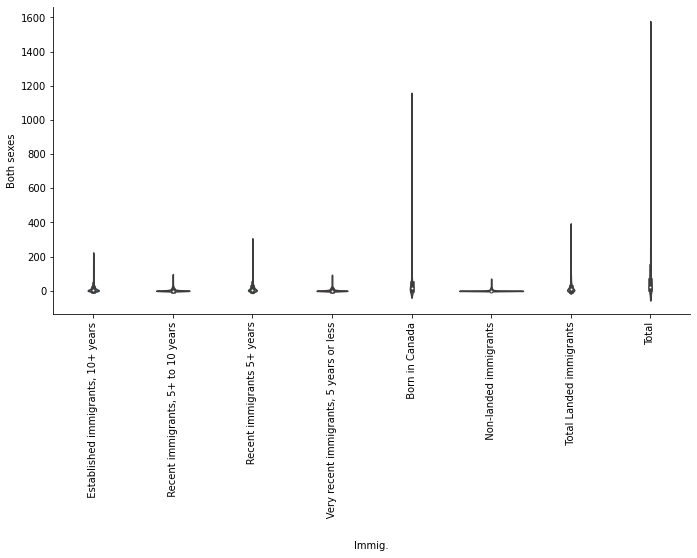

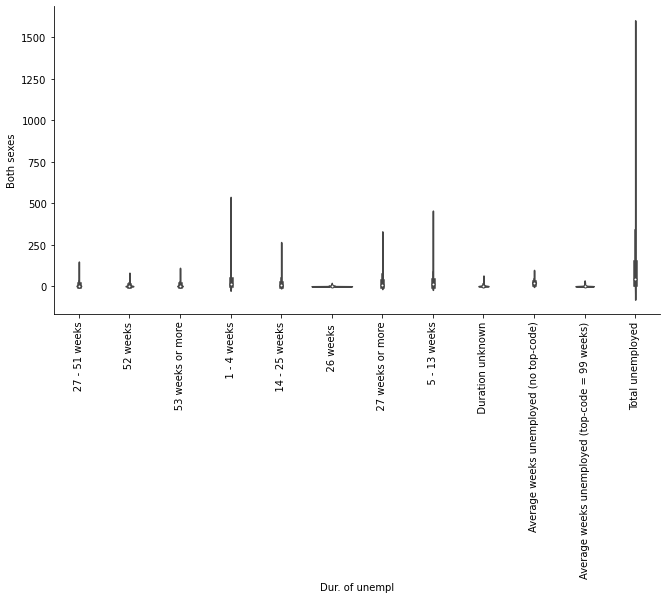

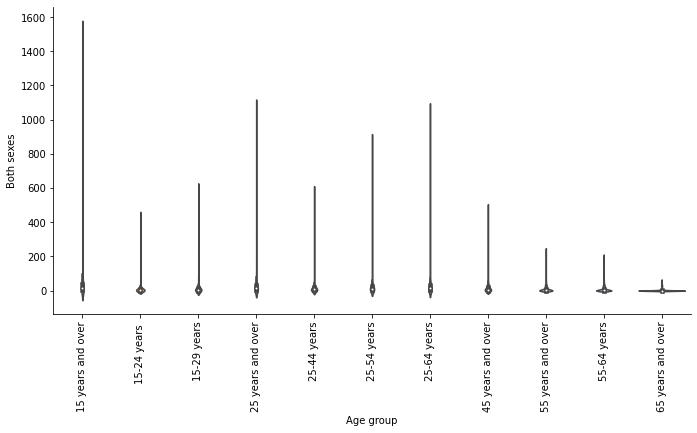

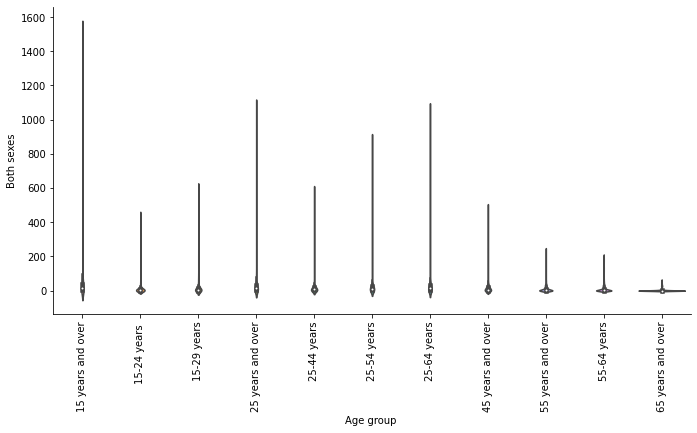

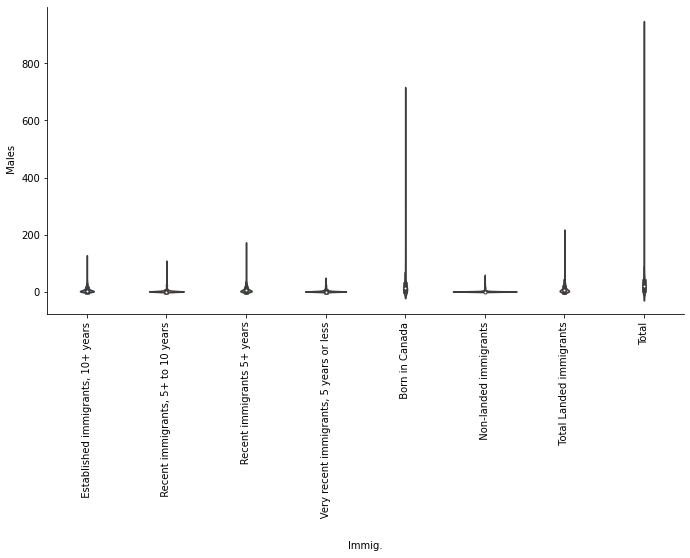

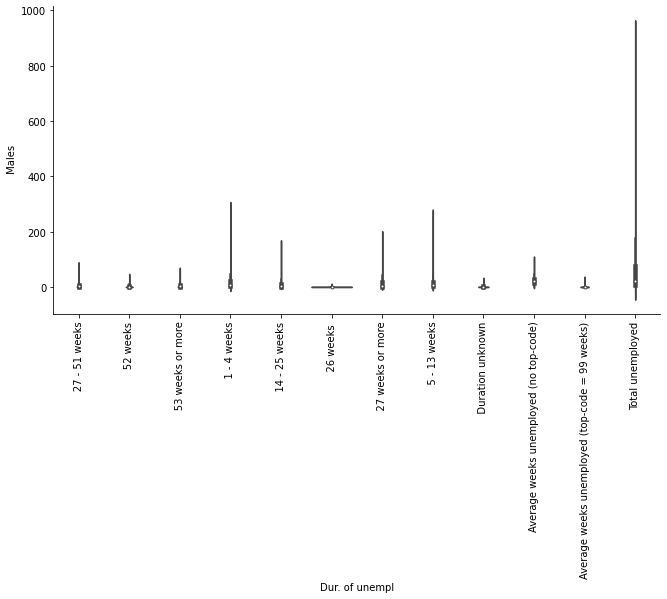

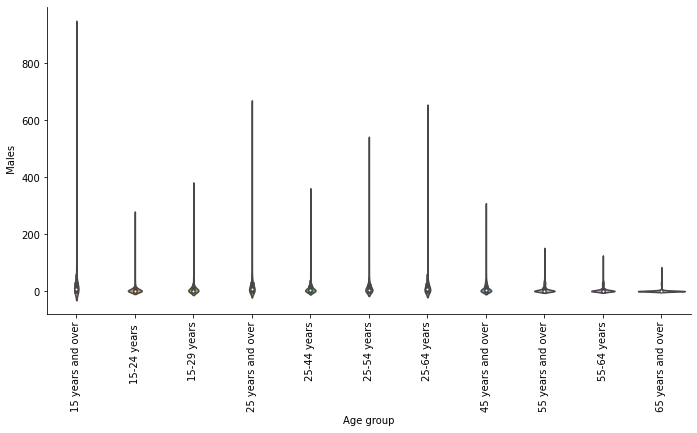

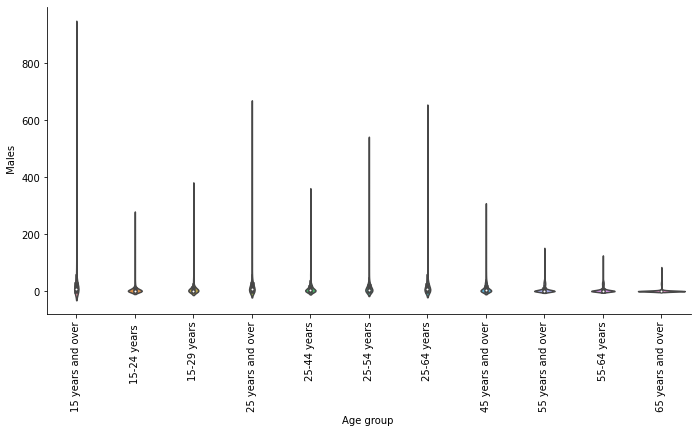

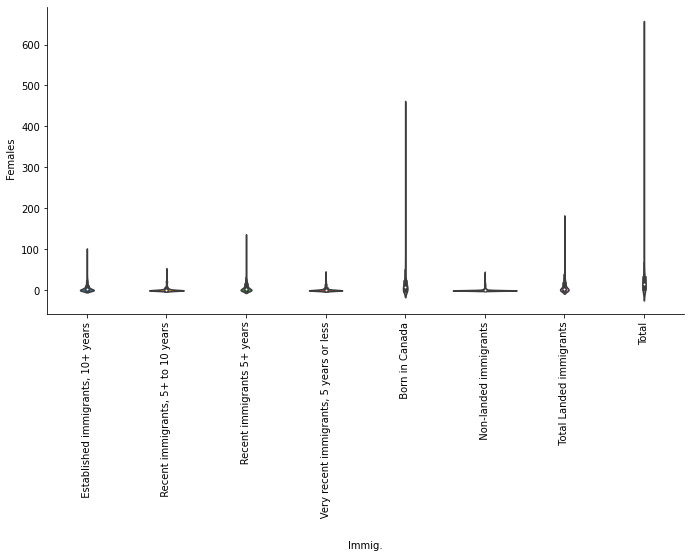

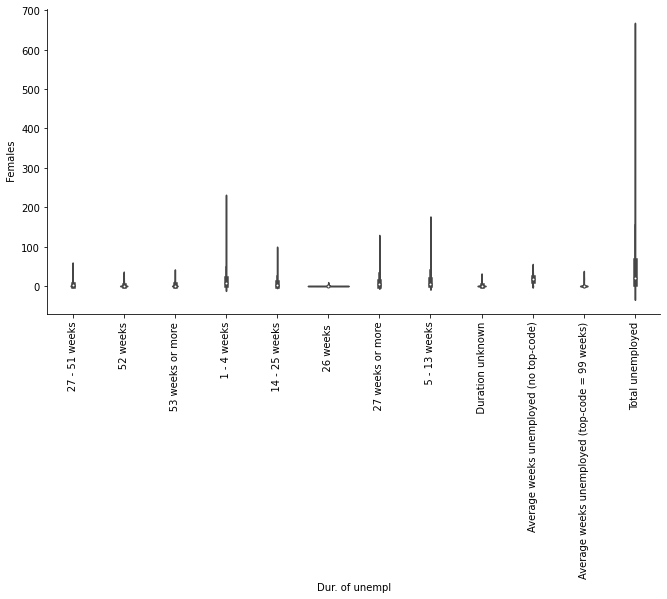

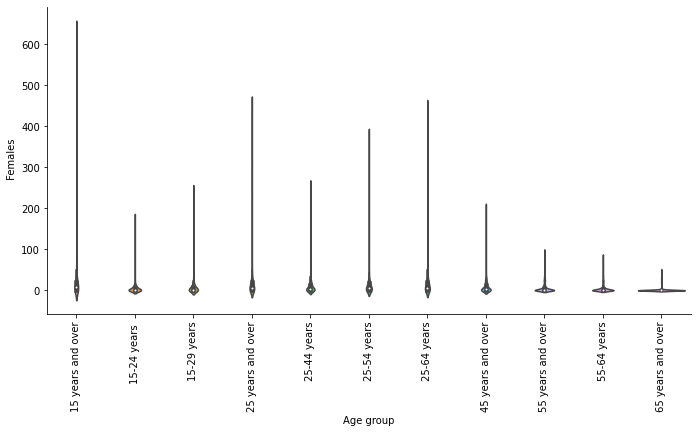

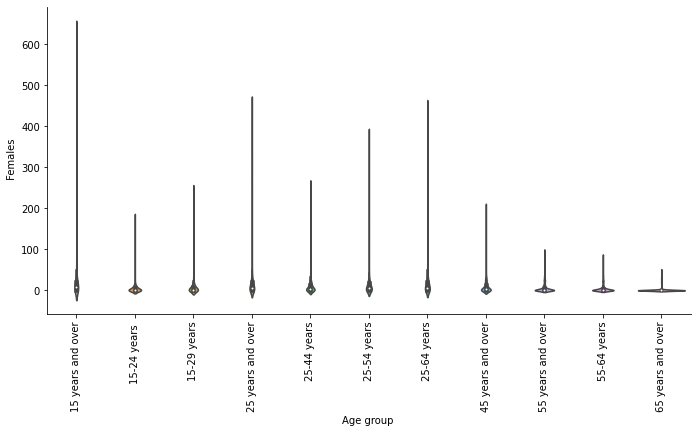


To check pairwise joint distribution of numeric data


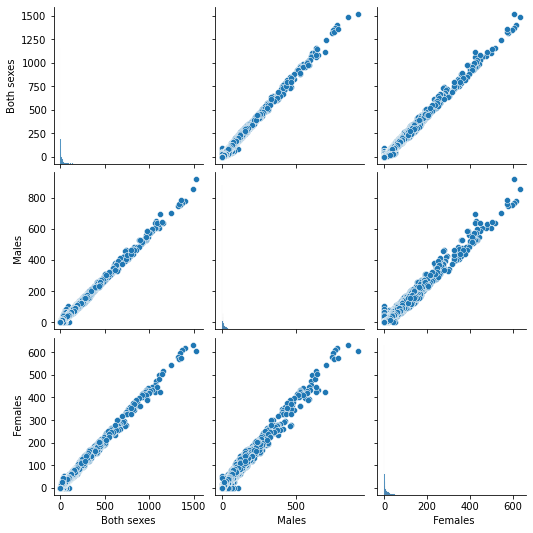


To check time series of numeric data  by daily, monthly and yearly frequency


In [85]:
eda(df1)